In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np

path = "quac_documents.json"
with open(path, "r") as f:
    documents = json.load(f)
    
texts = [doc["context"] for doc in documents][:1000]



In [4]:
import tiktoken
import matplotlib.pyplot as plt

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

texts = [doc["context"] for doc in documents][:1000]
counts = [num_tokens_from_string(d, "o200k_base") for d in texts]

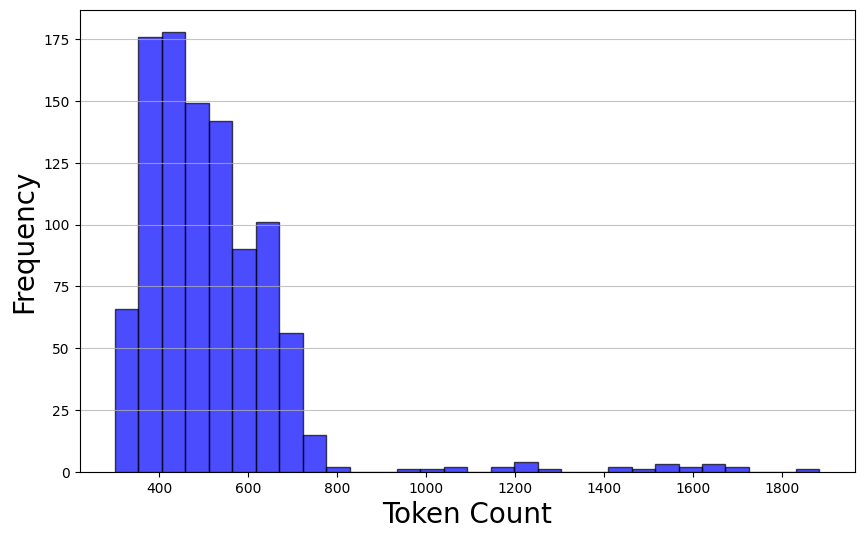

1000
518.611
518611


In [5]:
# Plotting the histogram of token counts
fig = plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
# plt.title("Histogram of Token Counts")
plt.xlabel("Token Count", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.grid(axis="y", alpha=0.75)

# Display the histogram
plt.show()
fig.savefig("quac_histo.pdf", bbox_inches='tight')

print(len(counts))
print(np.mean(counts))
print(sum(counts))

In [6]:
quac = np.array([
    [1008, 6917, 2331],
    [0.14, 0.3, 0.19],
    [437, 2556, 2893],
    [23, 14.1, 7.7],
    [67.73, 88.39, 87.55]
])

d2d = np.array([
    [917, 6218, 1921],
    [0.15, 0.32, 0.21],
    [408, 2491, 2731],
    [28, 14.4, 7.5],
    [60.30, 81.71, 80.93]
])
     
tpcqa = np.array([
    [1252, 8389, 2566],
    [0.14, 0.29, 0.19],
    [588, 2937, 3111],
    [28, 13.8, 7.5],
    [70.14, 91.53, 89.36]
])
     
coqa = np.array([
    [754, 5031, 1636],
    [0.16, 0.31, 0.22],
    [282, 1885, 2109],
    [19.7, 14.1, 8.2],
    [71.26, 94.22, 90.81]
])
     
doqa = np.array([
    [515, 3871, 1372],
    [0.15, 0.31, 0.2],
    [254, 1583, 1816],
    [23, 13.6, 7.5],
    [65.83, 87.16, 86.37]
])

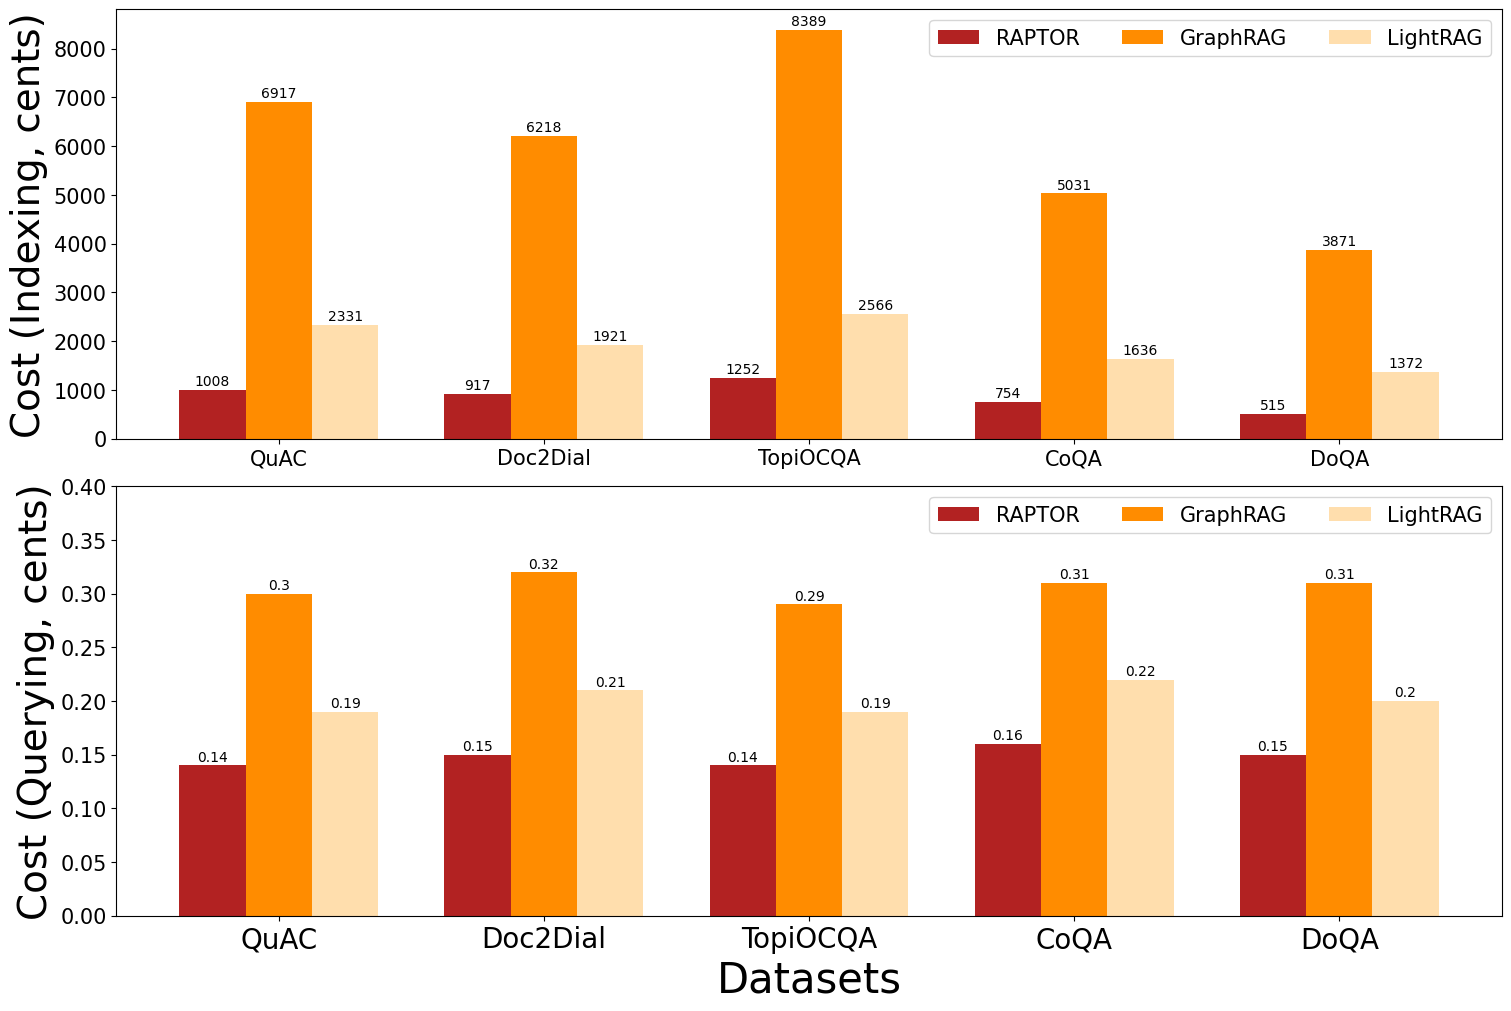

In [7]:
datasets = ("QuAC", "Doc2Dial", "TopiOCQA", "CoQA", "DoQA")
costs_index = {
    'RAPTOR': (quac[0][0], d2d[0][0], tpcqa[0][0], coqa[0][0], doqa[0][0]),
    'GraphRAG': (quac[0][1], d2d[0][1], tpcqa[0][1], coqa[0][1], doqa[0][1]),
    'LightRAG': (quac[0][2], d2d[0][2], tpcqa[0][2], coqa[0][2], doqa[0][2])
}
x = np.arange(len(datasets))  # the label locations
width = 0.25  # the width of the bars
multiplier = -1

fig, (ax1, ax2) = plt.subplots(2, layout='constrained', figsize = (15, 10))
colors = ['firebrick', 'darkorange', 'navajowhite']

for model, metrics in costs_index.items():
    offset = width * multiplier
    rects = ax1.bar(x + offset, metrics, width, label=model, color=colors[multiplier+1])
    ax1.bar_label(rects, padding=1)
    multiplier += 1
    
ax1.set_ylabel('Cost (Indexing, cents)', fontsize=28)
# ax1.set_xlabel('Datasets', fontsize=20)
ax1.set_xticks(x, datasets)
ax1.legend(loc='upper right', ncols=3, fontsize=15)

costs_query = {
    'RAPTOR': (quac[1][0], d2d[1][0], tpcqa[1][0], coqa[1][0], doqa[1][0]),
    'GraphRAG': (quac[1][1], d2d[1][1], tpcqa[1][1], coqa[1][1], doqa[1][1]),
    'LightRAG': (quac[1][2], d2d[1][2], tpcqa[1][2], coqa[1][2], doqa[1][2])
}

multiplier = -1
for model, metrics in costs_query.items():
    offset = width * multiplier
    rects = ax2.bar(x + offset, metrics, width, label=model, color=colors[multiplier+1])
    ax2.bar_label(rects, padding=1)
    multiplier += 1
    
ax2.set_ylabel('Cost (Querying, cents)', fontsize=28)
ax2.set_xlabel('Datasets', fontsize=30)
ax2.set_xticks(x, datasets, fontsize=20)
ax2.set_ylim(0, 0.4)
ax2.legend(loc='upper right', ncols=3, fontsize=15)

plt.show()
fig.savefig("costs.pdf", bbox_inches='tight')


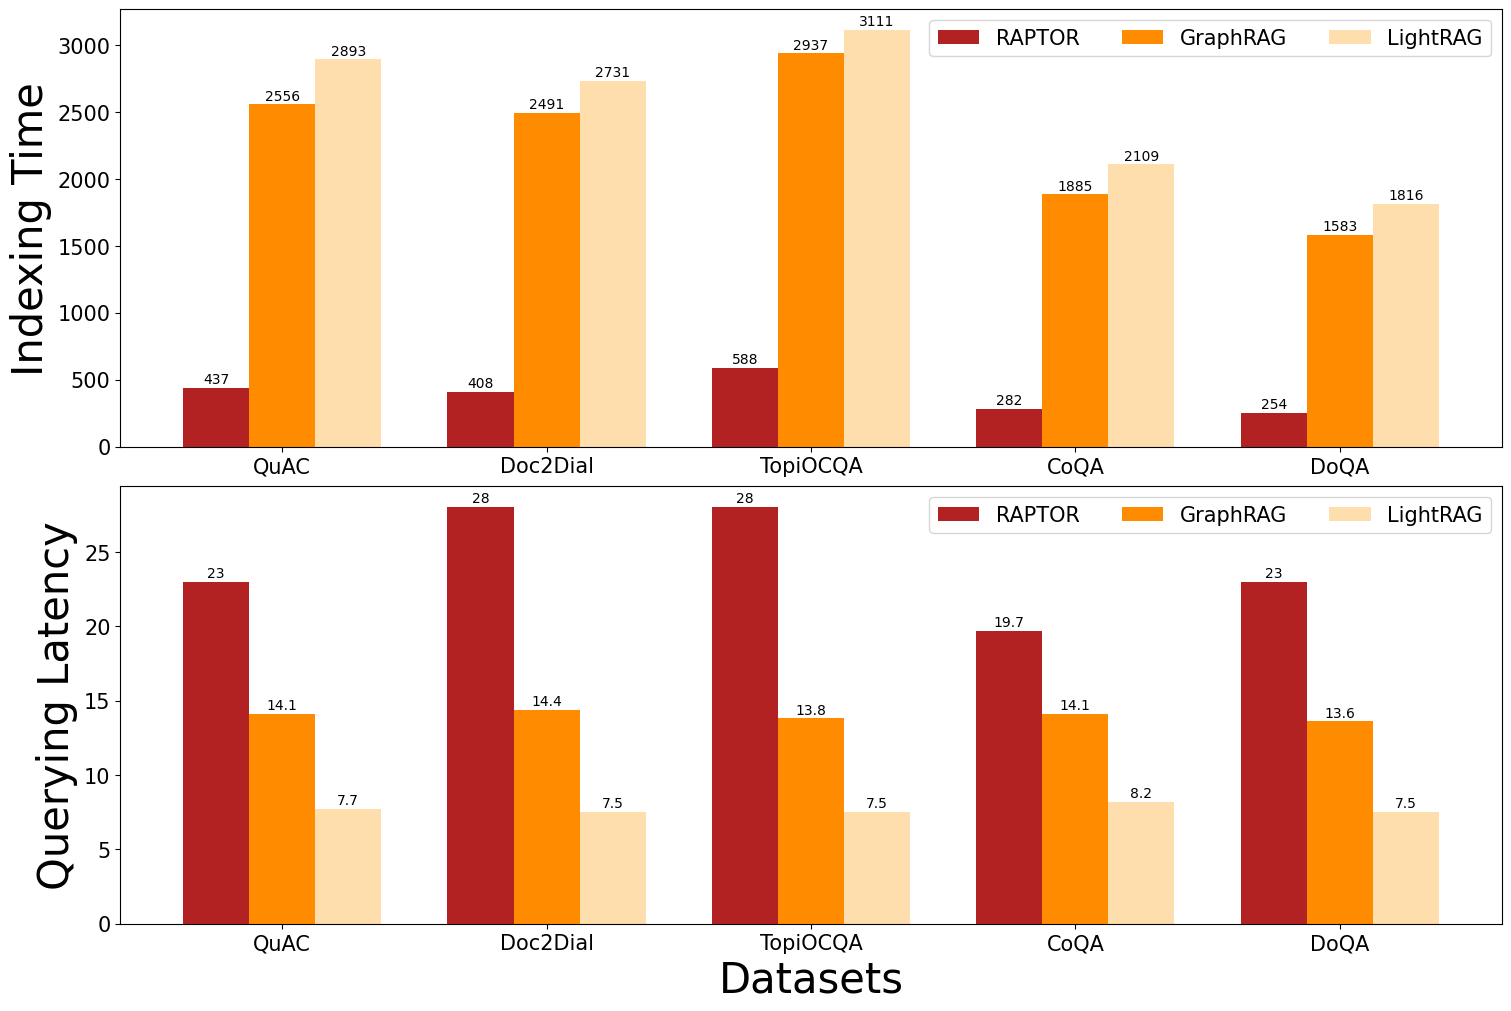

In [8]:
time_index = {
    'RAPTOR': (quac[2][0], d2d[2][0], tpcqa[2][0], coqa[2][0], doqa[2][0]),
    'GraphRAG': (quac[2][1], d2d[2][1], tpcqa[2][1], coqa[2][1], doqa[2][1]),
    'LightRAG': (quac[2][2], d2d[2][2], tpcqa[2][2], coqa[2][2], doqa[2][2])
}
x = np.arange(len(datasets))  # the label locations
width = 0.25  # the width of the bars
multiplier = -1

fig, (ax1, ax2) = plt.subplots(2, layout='constrained', figsize = (15, 10))
colors = ['firebrick', 'darkorange', 'navajowhite']

for model, metrics in time_index.items():
    offset = width * multiplier
    rects = ax1.bar(x + offset, metrics, width, label=model, color=colors[multiplier+1])
    ax1.bar_label(rects, padding=1)
    multiplier += 1
    
ax1.set_ylabel('Indexing Time', fontsize=30)
# ax1.set_xlabel('Datasets', fontsize=20)
ax1.set_xticks(x, datasets)
ax1.legend(loc='upper right', ncols=3, fontsize=15)

time_query = {
    'RAPTOR': (quac[3][0], d2d[3][0], tpcqa[3][0], coqa[3][0], doqa[3][0]),
    'GraphRAG': (quac[3][1], d2d[3][1], tpcqa[3][1], coqa[3][1], doqa[3][1]),
    'LightRAG': (quac[3][2], d2d[3][2], tpcqa[3][2], coqa[3][2], doqa[3][2])
}

multiplier = -1
for model, metrics in time_query.items():
    offset = width * multiplier
    rects = ax2.bar(x + offset, metrics, width, label=model, color=colors[multiplier+1])
    ax2.bar_label(rects, padding=1)
    multiplier += 1
    
ax2.set_ylabel('Querying Latency', fontsize=30)
ax2.set_xlabel('Datasets', fontsize=30)
ax2.set_xticks(x, datasets)
# ax2.set_ylim(0, 0.4)
ax2.legend(loc='upper right', ncols=3, fontsize=15)

plt.show()
fig.savefig("times.pdf", bbox_inches='tight')

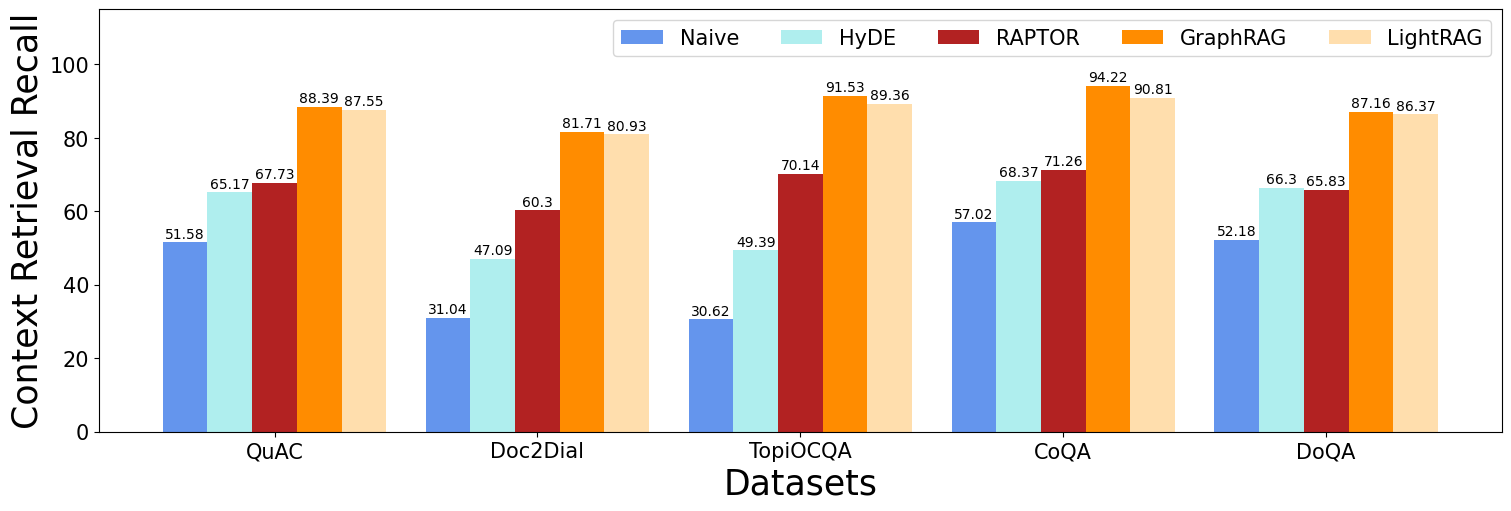

In [9]:
crr = {
    'Naive': (51.58, 31.04, 30.62, 57.02, 52.18),
    'HyDE': (65.17, 47.09, 49.39, 68.37, 66.3),
    'RAPTOR': (quac[4][0], d2d[4][0], tpcqa[4][0], coqa[4][0], doqa[4][0]),
    'GraphRAG': (quac[4][1], d2d[4][1], tpcqa[4][1], coqa[4][1], doqa[4][1]),
    'LightRAG': (quac[4][2], d2d[4][2], tpcqa[4][2], coqa[4][2], doqa[4][2])
}
x = np.arange(len(datasets))  # the label locations
width = 0.17  # the width of the bars
multiplier = -2

fig, ax = plt.subplots(layout='constrained', figsize = (15, 5))
colors = ['cornflowerblue', 'paleturquoise', 'firebrick', 'darkorange', 'navajowhite']

for model, metrics in crr.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, metrics, width, label=model, color=colors[multiplier+2])
    ax.bar_label(rects, padding=1)
    multiplier += 1
    
ax.set_ylabel('Context Retrieval Recall', fontsize=25)
ax.set_xlabel('Datasets', fontsize=25)
ax.set_xticks(x, datasets)
ax.set_ylim(0, 115)
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.legend(loc='upper right', ncols=5, fontsize=15)
plt.show()
fig.savefig("crr.pdf", bbox_inches='tight')